First, import needed modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [3]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [4]:
controls = pd.read_csv(f'{path}/data/controls.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})
treatment = pd.read_csv(f'{path}/data/treatment.csv', converters = {'AGS': str})

Merge df

In [5]:
control_treat = pd.merge(controls, treatment, on='AGS', how='outer', indicator=True)
control_treat['_merge'].value_counts()

both          336665
left_only       6382
right_only         6
Name: _merge, dtype: int64

Drop early and late years

In [6]:
control_treat = control_treat[control_treat['year'] > 1993]
control_treat = control_treat[control_treat['year'] < 2018]

In [7]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
for year, treatment in avg_dfs.items():
    avg_dfs[year] = control_treat[['pop_density', 'unemployed', 'avg_age', 'female', treatment, 'year']].groupby([treatment, 'year'], as_index = False).agg([np.mean, np.std, 'count'])
    avg_dfs[year] = avg_dfs[year].reset_index()
    avg_dfs[year].rename(columns = {treatment:'treatment'}, inplace = True)
    mean = control_treat[['pop_density', 'unemployed', 'avg_age', 'female', 'year']].groupby(['year'], as_index = False).agg([np.mean, np.std, 'count'])
    mean = mean.reset_index()
    mean['treatment'] = 'Mean'
    avg_dfs[year] = pd.concat([avg_dfs[year], mean])
avg_dfs[2005][avg_dfs[2005]['treatment'] == 'Mean'].head(40)

treatment    year pop_density                    unemployed            \
                            mean         std  count       mean       std   
0       Mean  1994.0  177.983198  273.726801  11235        NaN       NaN   
1       Mean  1995.0  179.495683  273.649804  11235        NaN       NaN   
2       Mean  1996.0  180.660328  273.530082  11235        NaN       NaN   
3       Mean  1997.0  181.543290  272.758212  11235        NaN       NaN   
4       Mean  1998.0  182.325160  272.530649  11235   4.562052  2.441889   
5       Mean  1999.0  183.131933  271.172853  11235   4.352015  2.440473   
6       Mean  2000.0  183.743671  271.892317  11235   4.207775  2.698692   
7       Mean  2001.0  184.315102  272.334939  11235   4.273641  2.866527   
8       Mean  2002.0  184.603404  272.895422  11235   4.490443  2.878124   
9       Mean  2003.0  184.637231  272.734872  11235   4.862838  3.015907   
10      Mean  2004.0  184.722517  273.028394  11235   4.865108  3.070327   
11      Mean  2005.0  184.548303  273.837692  11235   5.199646  2.924148   
12      Mean  2006.0  184.065419  274.036161  11235   4.723538  2.774153   
13      Mean  2007.0  183.693201  274.342249  11235   3.905358  2.511615   
14      Mean  2008.0  183.034397  274.356080  11235   3.308165  2.204572   
15      Mean  2009.0  182.511059  274.601614  11235   3.459419  1.953894   
16      Mean  2010.0  182.208634  275.192534  11235   3.213549  1.796892   
17      Mean  2011.0  181.976198  276.325922  11235   2.937928  1.817268   
18      Mean  2012.0  180.023644  272.272375  11235   2.827625  1.708779   
19      Mean  2013.0  180.175584  273.909646  11235   2.873463  1.629631   
20      Mean  2014.0  180.975135  276.112810  11235   2.744451  1.499770   
21      Mean  2015.0  182.662125  279.901456  11235   2.575198  1.381288   
22      Mean  2016.0  183.287438  281.820142  11235   2.452648  1.249592   
23      Mean  2017.0  183.730276  283.218212  11235   2.253809  1.092626   

             avg_age                      female                   
    count       mean       std  count       mean       std  count  
0       0        NaN       NaN      0        NaN       NaN      0  
1       0        NaN       NaN      0  50.554116  1.152348  10799  
2       0        NaN       NaN      0  50.516251  1.035296  10799  
3       0        NaN       NaN      0  50.497382  1.019976  10799  
4   10799        NaN       NaN      0  50.473580  1.016162  10799  
5   10799        NaN       NaN      0  50.456501  1.005093  10799  
6   10799        NaN       NaN      0  50.446845  0.997520  10799  
7   10799  40.241344  1.774452  10799  50.420910  0.999051  10799  
8   10799  40.555035  1.801721  10799  50.393882  0.993415  10799  
9   10798  40.897454  1.816544  10798  50.396477  0.989580  10798  
10  10798  41.270966  1.847474  10798  50.383901  0.989946  10798  
11  10798  41.655742  1.881154  10798  50.363922  0.995950  10798  
12  10798  42.068166  1.906464  10798  50.333968  0.997188  10798  
13  10798  42.439602  1.932873  10798  50.311415  1.007818  10798  
14  10798  42.810252  1.961271  10798  50.291731  1.013217  10798  
15  10798  43.186573  1.985881  10798  50.268841  1.019449  10798  
16  10798  43.524096  2.005315  10798  50.240130  1.016324  10798  
17  10797  43.844815  2.026106  10797  50.406841  0.926695  10797  
18  10797  44.156630  2.035843  10797  50.361241  0.920615  10797  
19  10797  44.431115  2.047883  10797  50.307307  0.927477  10797  
20  10797  44.671898  2.066090  10797  50.248659  0.926714  10797  
21  10797  44.752964  2.098749  10797  50.060685  1.008222  10797  
22  10797  44.912226  2.364855  10797  50.070324  0.924571  10797  
23  10797  45.108010  2.129146  10797  50.071169  0.913835  10797

Plot the averages of pop_density, unemployed, avg_age and female over years for treated and untreated municipalities

In [8]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']

for year, df in avg_dfs.items():
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=300, sharex=False)
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Averages values of control variables \n by treatment status in {year}', fontsize=20)
    for i, treatment in enumerate(treatments):
        plot_data = df[df['treatment'] == treatment]
        # edit subplots
        axes[0, 0].set_title('Population Density', fontsize=12)
        axes[0, 0].set_ylabel('Population Density', fontsize=10)
        axes[0, 0].errorbar(plot_data['year'], plot_data['pop_density', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
        axes[0, 0].legend(loc='upper left')
        axes[0, 0].axvline(x=year, c='red', linestyle='--')
        axes[0, 0].set_ylim(140, 300)
        axes[0, 0].set_xlim(1994, 2018)
        axes[0, 0].set_xticks([1994,1998,2002,2005,2009,2013,2017])
        axes[0, 0].tick_params(labelsize = 8)

        axes[0, 1].set_title('Share of Unemployed', fontsize=12)
        axes[0, 1].set_ylabel('% Unemployed', fontsize=10)
        axes[0, 1].errorbar(plot_data['year'], plot_data['unemployed', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
        axes[0, 1].legend(loc='upper left')
        axes[0, 1].axvline(x=year, c='red', linestyle='--')
        axes[0, 1].set_ylim(2, 6)
        axes[0, 1].set_xlim(1997, 2018)
        axes[0, 1].set_xticks([1998,2002,2005,2009,2013,2017])
        axes[0, 1].tick_params(labelsize = 8)

        axes[1, 0].set_title('Average Age', fontsize=12)
        axes[1, 0].set_ylabel('Average Age', fontsize=10)
        axes[1, 0].errorbar(plot_data['year'], plot_data['avg_age', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
        axes[1, 0].legend(loc='upper left')
        axes[1, 0].axvline(x=year, c='red', linestyle='--')
        axes[1, 0].set_ylim(40, 46)
        axes[1, 0].set_xlim(2000, 2018)
        axes[1, 0].set_xticks([2002,2005,2009,2013,2017])
        axes[1, 0].tick_params(labelsize = 8)

        axes[1, 1].set_title('Share of Females', fontsize=12)
        axes[1, 1].set_ylabel('% Female', fontsize=10)
        axes[1, 1].errorbar(plot_data['year'], plot_data['female', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
        axes[1, 1].legend(loc='upper left')
        axes[1, 1].axvline(x=year, c='red', linestyle='--')
        axes[1, 1].set_ylim(49.9, 51.1)
        axes[1, 1].set_xlim(1994, 2018)
        axes[1, 1].set_xticks([1994,1998,2002,2005,2009,2013,2017])
        axes[1, 1].tick_params(labelsize = 8)

    # Save figure
    fig.savefig(f'{path}/figures/controls/{year}_controls.png')
    plt.close()

Plot graph for ever-treated status

In [9]:
avg_ever_treated = control_treat[['pop_density', 'unemployed', 'avg_age', 'female', 'ever_treated', 'year']].groupby(['ever_treated', 'year'], as_index = False).agg([np.mean, np.std, 'count'])
avg_ever_treated = avg_ever_treated.reset_index()
avg_ever_treated.rename(columns = {'ever_treated':'treatment'}, inplace = True)
mean = control_treat[['pop_density', 'unemployed', 'avg_age', 'female', 'year']].groupby(['year'], as_index = False).agg([np.mean, np.std, 'count'])
mean = mean.reset_index()
mean['treatment'] = 'Mean'
avg_ever_treated = pd.concat([avg_ever_treated, mean])
avg_ever_treated[avg_ever_treated['treatment'] == 'Mean'].head()

treatment    year pop_density                    unemployed            \
                           mean         std  count       mean       std   
0      Mean  1994.0  177.983198  273.726801  11235        NaN       NaN   
1      Mean  1995.0  179.495683  273.649804  11235        NaN       NaN   
2      Mean  1996.0  180.660328  273.530082  11235        NaN       NaN   
3      Mean  1997.0  181.543290  272.758212  11235        NaN       NaN   
4      Mean  1998.0  182.325160  272.530649  11235   4.562052  2.441889   

         avg_age               female                   
   count    mean std count       mean       std  count  
0      0     NaN NaN     0        NaN       NaN      0  
1      0     NaN NaN     0  50.554116  1.152348  10799  
2      0     NaN NaN     0  50.516251  1.035296  10799  
3      0     NaN NaN     0  50.497382  1.019976  10799  
4  10799     NaN NaN     0  50.473580  1.016162  10799

In [10]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=300, sharex=False)
# set legend font size
plt.rc('legend',fontsize=6)
# title for entire figure
fig.suptitle(f'Averages values of control variables \n by ever treated status', fontsize=20)
#for ax in axes:
    #ax.set_xticks([1994,1998,2002,2005,2009,2013,2017])
for i, treatment in enumerate(treatments):
    plot_data = avg_ever_treated[avg_ever_treated['treatment'] == treatment]
    # edit subplots
    axes[0, 0].set_title('Population Density', fontsize=12)
    axes[0, 0].set_ylabel('Population Density', fontsize=10)
    axes[0, 0].errorbar(plot_data['year'], plot_data['pop_density', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
    axes[0, 0].legend(loc='upper left')
    axes[0, 0].set_ylim(140, 300)
    axes[0, 0].set_xticks([1994,1998,2002,2005,2009,2013,2017])
    axes[0, 0].tick_params(labelsize = 8)

    axes[0, 1].set_title('Share of Unemployed', fontsize=12)
    axes[0, 1].set_ylabel('% Unemployed', fontsize=10)
    axes[0, 1].errorbar(plot_data['year'], plot_data['unemployed', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
    axes[0, 1].legend(loc='upper left')
    axes[0, 1].set_ylim(2, 6)
    axes[0, 1].set_xlim(1997, 2018)
    axes[0, 1].set_xticks([1998,2002,2005,2009,2013,2017])
    axes[0, 1].tick_params(labelsize = 8)

    axes[1, 0].set_title('Average Age', fontsize=12)
    axes[1, 0].set_ylabel('Average Age', fontsize=10)
    axes[1, 0].errorbar(plot_data['year'], plot_data['avg_age', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
    axes[1, 0].legend(loc='upper left')
    axes[1, 0].set_ylim(40, 46)
    axes[1, 0].set_xlim(2000, 2018)
    axes[1, 0].set_xticks([2002,2005,2009,2013,2017])
    axes[1, 0].tick_params(labelsize = 8)

    axes[1, 1].set_title('Share of Females', fontsize=12)
    axes[1, 1].set_ylabel('% Female', fontsize=10)
    axes[1, 1].errorbar(plot_data['year'], plot_data['female', 'mean'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, capsize=4)
    axes[1, 1].legend(loc='upper left')
    axes[1, 1].set_ylim(49.9, 51.1)
    axes[1, 1].set_xlim(1994, 2018)
    axes[1, 1].set_xticks([1994,1998,2002,2005,2009,2013,2017])
    axes[1, 1].tick_params(labelsize = 8)

# Save figure
fig.savefig(f'{path}/figures/controls/ever_treated_controls.png')
plt.close()

Plot a map of municipalities with controls available

In [11]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')
# set year to treatment year
powerlines['year'] = np.where(powerlines['year'] == '2013', '2014', powerlines['year'])
powerlines['year'] = np.where(powerlines['year'] == '2009', '2010', powerlines['year'])

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Subset controls to keep only the obs were all controls are available

In [12]:
controls.columns

Index(['AGS', 'year', 'pop_density', 'unemployed', 'avg_age', 'female'], dtype='object')

In [13]:
controls_sub = controls.dropna(subset=['pop_density', 'unemployed', 'avg_age', 'female'])
controls_sub = controls_sub.groupby(['AGS'], as_index=False).first()
controls_sub.shape

(10799, 6)

In [14]:
control_sub_map = pd.merge(controls_sub, municipalities, on='AGS', how='left', indicator=True)
control_sub_map['_merge'].value_counts()

both          10798
left_only         1
right_only        0
Name: _merge, dtype: int64

KeyboardInterrupt: 

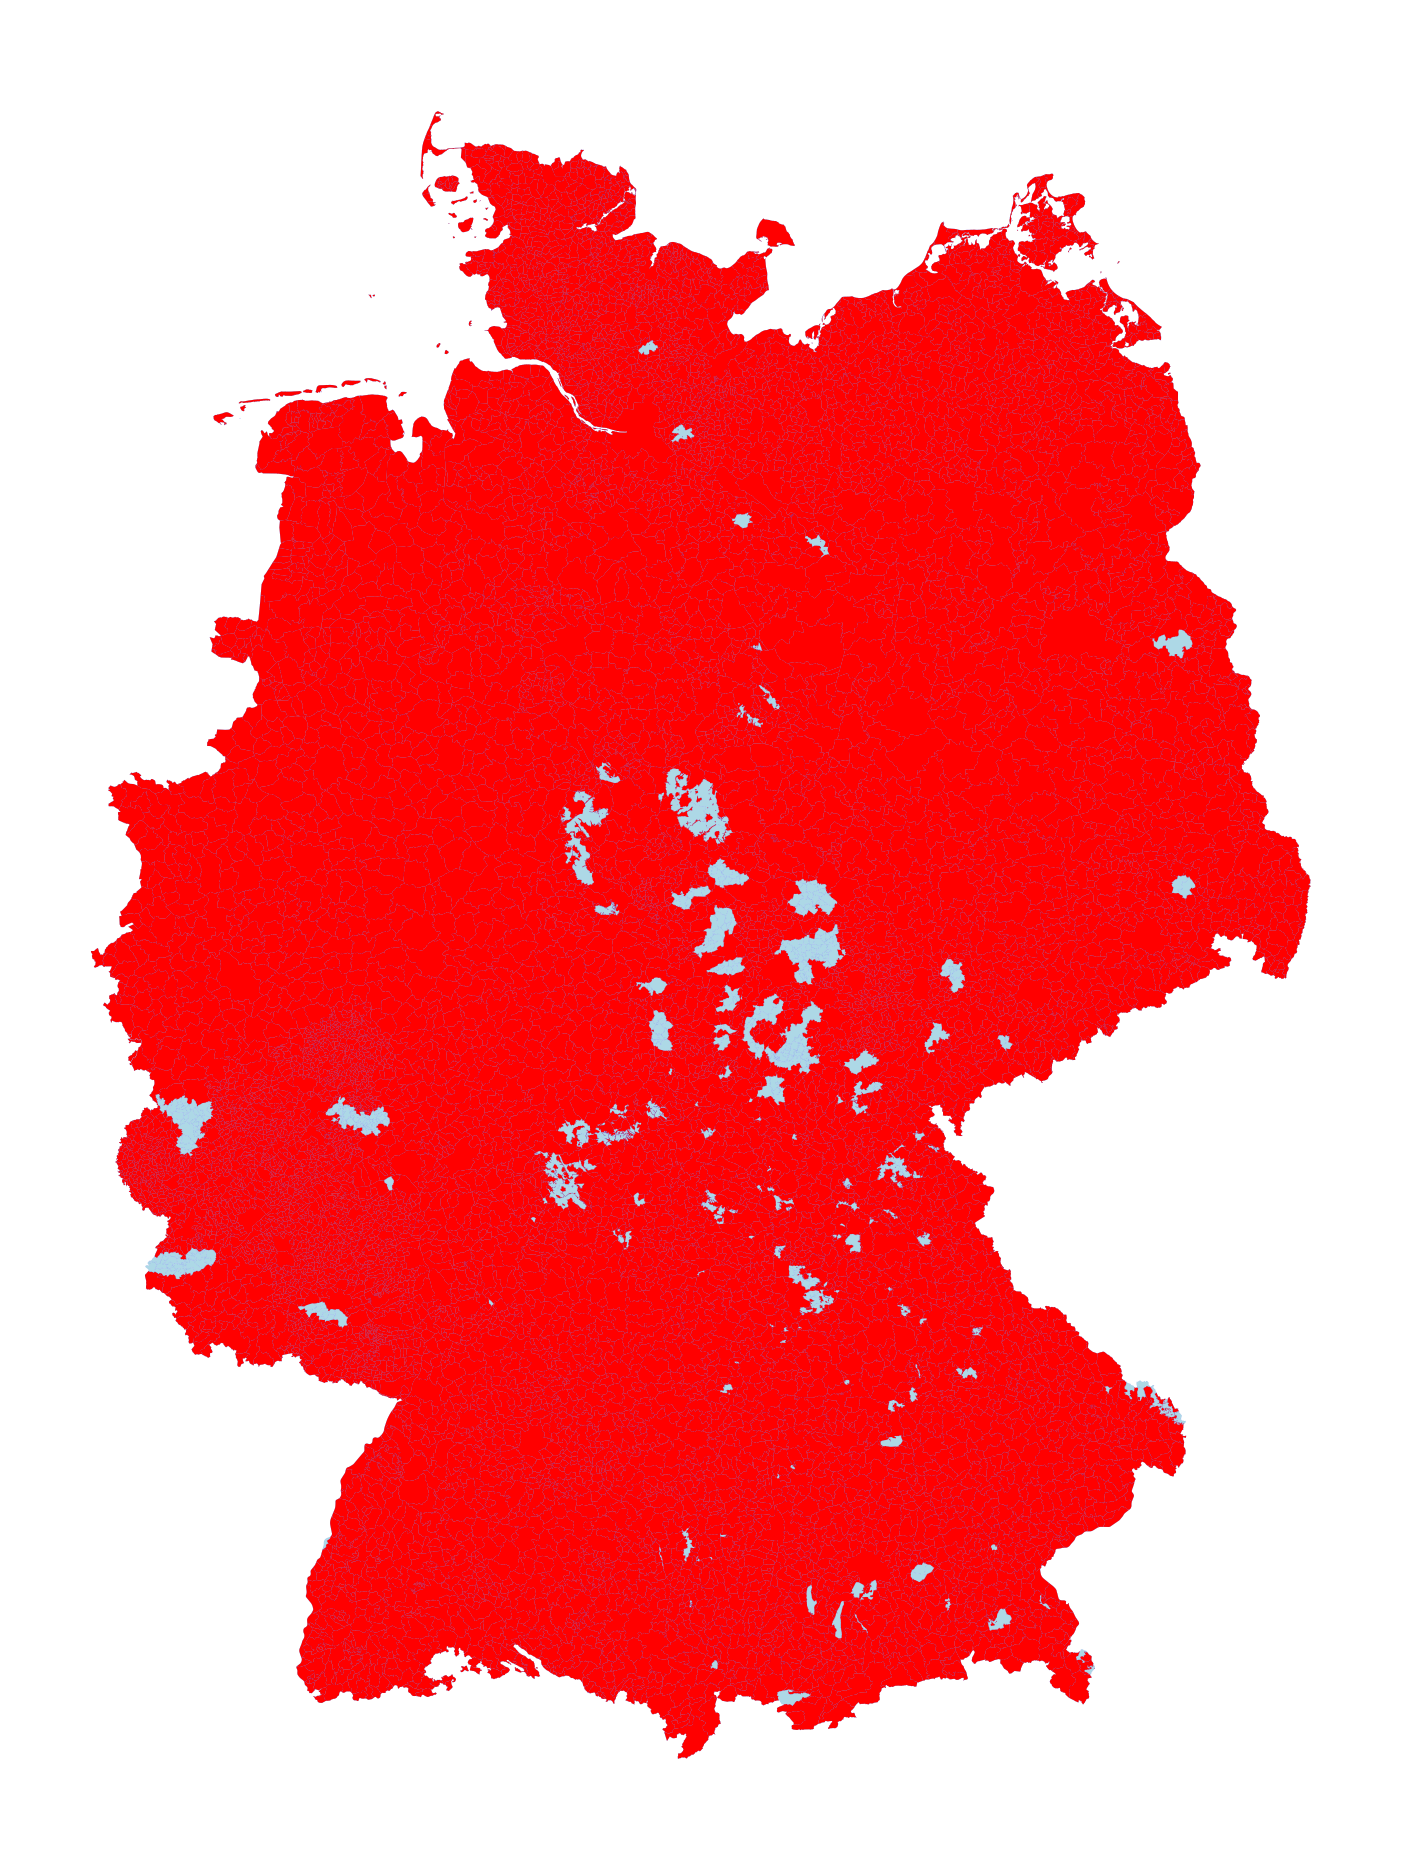

In [15]:
legend_dict = {2005: 'DENA 2005', 2010: 'EnLAG 2009', 2014: 'BBPlG 2013'}
control_sub_map = control_sub_map.set_geometry('geometry')
# setup figure
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
control_sub_map.plot(ax=ax, color='red', edgecolor='blue', lw=0.01, zorder=2)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=3)
powerlines.plot(ax=ax, column='year', cmap='winter', legend=True, lw=2, zorder=4)
plt.title(f'Municipalities with control variables available', fontsize=20)
#ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, c='black')
# change legend order
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), legend_dict)
plt.savefig(f'{path}/figures/controls/mun_with_controls.png')
plt.close()